# Rail Performance

Canadian railway companies make data available on the utilization of theirrail terminals, and this data is published by Statscan. We can use this data to track how Canadian busy, or efficient Canadian rail companies are.

### Pandas Display Options

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 200)

In [2]:
import sys

sys.path.append('../..')
from opencanada import StatscanZip

In [3]:
sys.executable

'C:\\Users\\dwight\\Anaconda3\\envs\\canadadataviz\\python.exe'

## Load Data

The data is located at the following url

In [4]:
RAIL_DATASET_URL ='https://www150.statcan.gc.ca/n1/tbl/csv/23100274-eng.zip'

In [5]:
rail_dataset = StatscanZip(RAIL_DATASET_URL)
rail_data = rail_dataset.get_data()

Extracting files to C:\Users\dwight\.canadadata\repo\extracted\23100274


Here is what the data looks like. There are the standard date (**REF_DATE**) and location (**GEO**) available to statsncan datasets.

In [6]:
rail_data.head(30)

,REF_DATE,GEO,Companies,Terminal dwell-time
0,2018-11-24,Canada,"Canadian National, System-wide",18.6
1,2018-11-24,Canada,"Canadian National, Edmonton terminal, Alberta",9.6
2,2018-11-24,Canada,"Canadian National, Vancouver terminal, British Columbia",22.8
3,2018-11-24,Canada,"Canadian National, Winnipeg terminal, Manitoba",13.5
4,2018-11-24,Canada,"Canadian National, MacMilllan yard, Ontario",18.8
5,2018-11-24,Canada,"Canadian National, Taschereau yard, Quebec",6.8
6,2018-11-24,Canada,"Canadian National, Prince George yard, British Columbia",22.2
7,2018-11-24,Canada,"Canadian National, Saskatoon yard, Saskatchewan",17.8
8,2018-11-24,Canada,"Canadian National, Brampton intermodal, Ontario",20.7
9,2018-11-24,Canada,"Canadian National, Scotford, Alberta",15.0


## Explore Data

For any data project it is a really good first step to explore the data that we have, just to get a sense of whether we have the right data, whether it is suficient data, and what types of cleaning and processing it will need. The quickest way is by using **head(n)** to see the first n rows, or **tail(n)** to see the last n. You can also use **sample(n)** to get a random sample of the data, to get a general sense of what it looks like and what any potential issues are. 

When viewing raw data in a notebook you might need adjust the pandas display options, to show more columns, to show more rows or to adjust the column width.

There are a couple of other tools **pandas_summary**, and **pandas-profiling** that can give a deeper exploration of the data. We will use pandas-profiling here.

### Pandas-Profiling

In [7]:
import pandas_profiling

pandas_profiling.ProfileReport(rail_data)

Number of variables,4
Number of observations,751
Total Missing (%),4.2%
Total size in memory,24.2 KiB
Average record size in memory,33.0 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [2]:
import sys

sys.executable

'C:\\Users\\dwight\\Anaconda3\\python.exe'

## Transform Data

### Removing Missing Values

Let's filter out one row where the value for Companies is 'Not applicable' and there  is no value for Terminal-dwell time

In [52]:
rail_data = rail_data[~(rail_data.Companies == 'Not applicable')]

### Extracting Location Data

The Companies column contains the company name, the terminal and the province. It is best to extract these into separate columns so that we have more information to analyze. We need for sure the company name and the terminals.

An example column value is **Canadian National, Vancouver terminal, British Columbia**, so the general pattern is **Company, Terminal, Province**. But soe values are like this **Canadian National, System-wide**, where the province is absent and represents all of Canada presumably. 

We can extract by splitting the strings by commas but another way is through regular expressions. Let's define the following regular expression.

In [53]:
rail_location_regex = r'(?P<Company>[^,]*), (?P<Terminal>[^,]*),? ?(?P<Location>[^,]*)?'

Since we are splitting a comma delimited string we use the expression [^,]* to match one or more non-comma characters. This is captured within a group and assigned a name using the expression **?P&lt;MatchName&gt;**. For example, **?P&lt;Company&gt;** assigns the name **Company** to whatever is matched in in the first group

Now, we can use the pandas **extract** function on the Companies column. This creates a dataframe with each column being a group from the regular expression.

In [55]:
rail_locations = rail_data.Companies.str.extract(rail_location_regex)

We can take a look at tbe resulting values. The Company, Terminal and Location have been separated out into columns, which simplifies downstream processing.

In [62]:
rail_locations.head(10)

,Company,Terminal,Location
0,Canadian National,System-wide,
1,Canadian National,Edmonton terminal,Alberta
2,Canadian National,Vancouver terminal,British Columbia
3,Canadian National,Winnipeg terminal,Manitoba
4,Canadian National,MacMilllan yard,Ontario
5,Canadian National,Taschereau yard,Quebec
6,Canadian National,Prince George yard,British Columbia
7,Canadian National,Saskatoon yard,Saskatchewan
8,Canadian National,Brampton intermodal,Ontario
9,Canadian National,Scotford,Alberta


At this point, we have the original **rail_data** dataframe plus a new dataframe containing the **rail_locations**.

In [57]:
rail_data.head(2)

,REF_DATE,GEO,Companies,Terminal dwell-time
0,2018-11-24,Canada,"Canadian National, System-wide",18.6
1,2018-11-24,Canada,"Canadian National, Edmonton terminal, Alberta",9.6


In [58]:
rail_locations.head(2)

,Company,Terminal,Location
0,Canadian National,System-wide,
1,Canadian National,Edmonton terminal,Alberta


Let's concatenate the two dataframes and select the columns we want to keep

In [72]:
company_rail_data = pd.concat([rail_data, rail_locations], axis=1)
company_rail_data = company_rail_data.set_index('REF_DATE')[['Company', 'Terminal','Location', 'Terminal dwell-time']]

In [71]:
company_rail_data.head(2)

,Company,Terminal,Location,Terminal dwell-time
REF_DATE,,,,
2018-11-24,Canadian National,System-wide,,18.6
2018-11-24,Canadian National,Edmonton terminal,Alberta,9.6


## System Wide

In [73]:
by_company = company_rail_data.query("Terminal=='System-wide'").drop(columns=['Terminal','Location'])

In [75]:
by_company.tail(20)

,Company,Terminal dwell-time
REF_DATE,,
2019-04-06,Canadian National,17.1
2019-04-06,Canadian Pacific,18.7
2019-04-06,Burlington Northern Santa Fe,19.7
2019-04-06,CSXT,NaN
2019-04-13,Canadian National,16.1
2019-04-13,Canadian Pacific,17.3
2019-04-13,Burlington Northern Santa Fe,16.1
2019-04-13,CSXT,NaN
2019-04-20,Canadian National,15.4


In [79]:
by_company.query("Company == 'CSXT'")

,Company,Terminal dwell-time
REF_DATE,,
2018-11-24,CSXT,NaN
2018-12-01,CSXT,NaN
2018-12-08,CSXT,NaN
2018-12-15,CSXT,NaN
2018-12-22,CSXT,NaN
2018-12-29,CSXT,NaN
2019-01-05,CSXT,NaN
2019-01-12,CSXT,NaN
2019-01-19,CSXT,NaN


## Canada Pacific

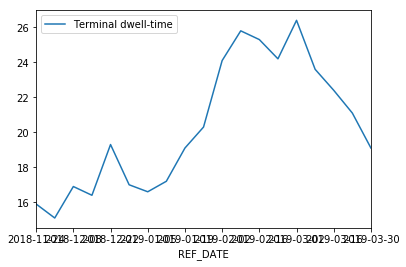

In [65]:
cp_system_wide.plot()

In [66]:
import hvplot.pandas
cp_system_wide[['Terminal dwell-time']].hvplot()

:Curve   [REF_DATE]   (Terminal dwell-time)

## By Company

In [8]:
by_company = rail_system_wide.reset_index().set_index(['REF_DATE', 'Company'])

NameError: name 'rail_system_wide' is not defined

In [87]:
by_company.hvplot('REF_DATE', groupby='Company', width=600, dynamic=False)

:HoloMap   [Company]
   :Curve   [REF_DATE]   (Terminal dwell-time)

In [69]:
rail_data.index.dtype

dtype('O')